
# Self Learning Tutorial
Vital signs: 
systolic blood pressure (SBP),
mean arterial pressure (MAP), 
respiratory rate (RR), 
oxygen saturation (PulOx), 
heart rate (HR), 
temperature (Temp)

Lab results: 
white blood cell count (WBC), 
bilirubin (Bili), 
blood urea nitrogen (BUN), 
lactate (Lac), 
creatinine (Creat), 
platelet count (Plat), 
neutrophils (Bands)

Intervention: fraction of inspired Oxygen (FiO2)

The CHARTEVENTS table in MIMIC III contains patient vitals. Key concepts related to vital signs can be identified by itemid. For example:​

Systolic Blood Pressure (SBP): itemid = 220050 (ART BP Systolic)​

Mean Arterial Pressure (MAP): itemid = 220052 (ART Mean BP)​

Respiratory Rate (RR): itemid = 220210 (Respiratory Rate)​

Oxygen Saturation (PulOx): itemid = 220277 (O2 saturation pulseoxymetry)​

Heart Rate (HR): itemid = 220045 (Heart Rate)​

Temperature (Temp): itemid = 223761 (Temperature Fahrenheit)

In [5]:
# Get data from the CHARTEVENTS table in the MIMIC-III database
dataset_labevents = 'mimic/LABEVENTS.csv'
dataset_chartevents = 'mimic/CHARTEVENTS.csv'
dataset_labitems = 'mimic/D_LABITEMS.csv'


In [6]:
# show the chart events
import pandas as pd
dataset_chartitems = 'mimic/D_ITEMS.csv'
df_chartitems = pd.read_csv(dataset_chartitems)

df_chartitems.columns = df_chartitems.columns.str.lower()
result = df_chartitems.loc[df_chartitems['itemid'].isin([ 220050, 220052, 220210, 220277, 220045, 223761])]
print(result)

       row_id  itemid                             label   abbreviation  \
11498   12712  220045                        Heart Rate             HR   
11502   12716  220050  Arterial Blood Pressure systolic           ABPs   
11504   12718  220052      Arterial Blood Pressure mean           ABPm   
11524   12738  220210                  Respiratory Rate             RR   
12355   12746  220277       O2 saturation pulseoxymetry           SpO2   
12366   12757  223761            Temperature Fahrenheit  Temperature F   

         dbsource      linksto             category  unitname param_type  \
11498  metavision  chartevents  Routine Vital Signs       bpm    Numeric   
11502  metavision  chartevents  Routine Vital Signs      mmHg    Numeric   
11504  metavision  chartevents  Routine Vital Signs      mmHg    Numeric   
11524  metavision  chartevents          Respiratory  insp/min    Numeric   
12355  metavision  chartevents          Respiratory         %    Numeric   
12366  metavision  charte

Lab Results:​

The LABEVENTS table stores the laboratory measurements.​

White Blood Cell Count (WBC): itemid = 51300 (White Blood Cells)​

Bilirubin (Bili): itemid = 50885 (Bilirubin, Total)​

Blood Urea Nitrogen (BUN): itemid = 51006 (Urea Nitrogen)​

Lactate (Lac): itemid = 50813 (Lactate)​

Creatinine (Creat): itemid = 50912 (Creatinine)​

Platelet Count (Plat): itemid = 51265 (Platelets)​

Neutrophils (Bands): itemid = 51146 (Bands - Neutrophils)

In [7]:
# show the lab items
import pandas as pd
df_labitems = pd.read_csv(dataset_labitems)

df_labitems.columns = df_labitems.columns.str.lower()
result = df_labitems.loc[df_labitems['itemid'].isin([51300, 50885, 51006, 50813, 50912, 51265, 51146])]
print(result)


     row_id  itemid             label  fluid    category loinc_code
140      14   50813           Lactate  Blood   Blood Gas    32693-4
212      86   50885  Bilirubin, Total  Blood   Chemistry     1975-2
239     113   50912        Creatinine  Blood   Chemistry     2160-0
332     206   51006     Urea Nitrogen  Blood   Chemistry     3094-0
472     346   51146         Basophils  Blood  Hematology      704-7
591     465   51265    Platelet Count  Blood  Hematology      777-3
626     500   51300         WBC Count  Blood  Hematology    26464-8


Interventions:​

The INPUTEVENTS_MV or INPUTEVENTS_CV table can be used to find oxygen administration values.​

Fraction of Inspired Oxygen (FiO2): itemid = 223835 (FiO2 in the CHARTEVENTS table)

In [8]:
# show FiO2 item
result = df_chartitems.loc[df_chartitems['itemid'].isin([223835])]
print(result)


       row_id  itemid                 label abbreviation    dbsource  \
12413   12804  223835  Inspired O2 Fraction         FiO2  metavision   

           linksto     category unitname param_type  conceptid  
12413  chartevents  Respiratory      NaN    Numeric        NaN  


ICD-9 Codes for Sepsis-Related Identification:
To identify patients with sepsis and septic shock, ICD-9 codes are used in the DIAGNOSES_ICD table. Relevant codes include:

Sepsis: 99591 (Sepsis), 99592 (Severe Sepsis)
Septic Shock: 78552 (Septic Shock)

In [9]:
# Get data from DIAGNOSES_ICD table in the MIMIC-III database using ICD-9 codes for sepsis related identification
dataset_icd9_code = 'mimic/D_ICD_DIAGNOSES.csv'
df_icd9_code = pd.read_csv(dataset_icd9_code)

df_icd9_code.columns = df_icd9_code.columns.str.lower()
result = df_icd9_code.loc[df_icd9_code['icd9_code'].isin(['99591', '99592', '78552'])]
print(result)

       row_id icd9_code    short_title     long_title
10304   11403     99591         Sepsis         Sepsis
10305   11404     99592  Severe sepsis  Severe sepsis
13142   12991     78552   Septic shock   Septic shock


Load chartevents in chunks to avoid overloading memory

In [10]:
# This table contains the ICD-9 codes for the diagnoses of patients in the MIMIC-III database
dataset_diagnoses = 'mimic/DIAGNOSES_ICD.csv'
diagnoses_icd = pd.read_csv(dataset_diagnoses)
print(diagnoses_icd.head())

   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1297         109   172335      1.0     40301
1    1298         109   172335      2.0       486
2    1299         109   172335      3.0     58281
3    1300         109   172335      4.0      5855
4    1301         109   172335      5.0      4254


In [11]:
# Define the relevant itemids for vital signs and FiO2
vital_signs_itemids = [220050, 220052, 220210, 220277, 220045, 223761]  # SBP, MAP, RR, PulOx, HR, Temp
fio2_itemid = [223835]  # FiO2
relevant_itemids = vital_signs_itemids + fio2_itemid

# Load diagnoses to identify sepsis patients
diagnoses_df = pd.read_csv(dataset_diagnoses, usecols=['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE'])
sepsis_icd9_codes = ['99591', '99592', '78552']  # Sepsis-related ICD-9 codes
# drop rows with missing values
diagnoses_df.dropna(inplace=True)
print(diagnoses_df.count())
# Create a set of hadm_ids for all patients for fast lookup
all_hadm_ids = set(diagnoses_icd['HADM_ID'].unique())


SUBJECT_ID    651000
HADM_ID       651000
ICD9_CODE     651000
dtype: int64


In [12]:
# save diagnoses_icd to a csv file
diagnoses_df.to_csv('diagnoses.csv', index=False)

In [13]:
lab_results_itemids = [51300, 50885, 51006, 50813, 50912, 51265, 51146] # WBC, HCO3, PLATELET, PH, GLUCOSE, BUN, CREATININE
labevents = pd.read_csv(dataset_labevents, usecols=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME', 'ITEMID', 'VALUENUM'])
labevents = labevents[labevents['ITEMID'].isin(lab_results_itemids) & labevents['HADM_ID'].isin(all_hadm_ids)]
labevents.dropna(inplace=True)
print(labevents.count())


SUBJECT_ID    2297442
HADM_ID       2297442
ITEMID        2297442
CHARTTIME     2297442
VALUENUM      2297442
dtype: int64


In [14]:
print(labevents.head())

     SUBJECT_ID   HADM_ID  ITEMID            CHARTTIME  VALUENUM
166           3  145834.0   50912  2101-10-20 16:40:00       3.2
177           3  145834.0   50885  2101-10-22 04:00:00       0.8
180           3  145834.0   50912  2101-10-22 04:00:00       1.9
187           3  145834.0   51006  2101-10-22 04:00:00      36.0
189           3  145834.0   51146  2101-10-22 04:00:00       0.3


In [15]:
# convert chartime to year, month, day
labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])
labevents['YEAR'] = labevents['CHARTTIME'].dt.year
labevents['MONTH'] = labevents['CHARTTIME'].dt.month
labevents['DAY'] = labevents['CHARTTIME'].dt.day
# pivot the labevents table
labevents_pivot = labevents.pivot_table(index=['SUBJECT_ID', 'HADM_ID', 'YEAR','MONTH','DAY'], columns='ITEMID', values='VALUENUM')
labevents_pivot.reset_index(inplace=True)
# fill NaN values with 0
labevents_pivot.fillna(0, inplace=True)
print(labevents_pivot.count())
print(labevents_pivot.head())

ITEMID
SUBJECT_ID    521799
HADM_ID       521799
YEAR          521799
MONTH         521799
DAY           521799
50813         521799
50885         521799
50912         521799
51006         521799
51146         521799
51265         521799
51300         521799
dtype: int64
ITEMID  SUBJECT_ID   HADM_ID  YEAR  MONTH  DAY  50813  50885  50912  \
0                2  163353.0  2138      7   17  0.000    0.0    0.0   
1                2  163353.0  2138      7   20  0.000    9.3    0.0   
2                3  145834.0  2101     10   20  6.525    0.8    2.7   
3                3  145834.0  2101     10   21  2.325    0.0    2.5   
4                3  145834.0  2101     10   22  1.300    0.8    1.8   

ITEMID      51006  51146       51265  51300  
0        0.000000    0.0  153.500000    0.0  
1        0.000000    0.0    0.000000    0.0  
2       45.666667    0.0  241.666667    0.0  
3       42.000000    0.0  289.000000    0.0  
4       34.000000    0.3  179.000000    0.0  


In [16]:
# save labevents to a csv file
labevents.to_csv('labevents_pivot.csv', index=False)

In [26]:
# Initialize an empty list to store filtered data
filtered_chartevents = []

# Define the chunk size (number of rows to read at a time)
chunk_size = 100000  # 100k rows per chunk

# Read CHARTEVENTS in chunks
chartevents_chunks = pd.read_csv(dataset_chartevents, usecols=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME', 'ITEMID', 'VALUENUM'], chunksize=chunk_size)

# Process each chunk
for filtered_chunk in chartevents_chunks:
    # Filter the chunk based on relevant itemid and sepsis patients' hadm_id
    filtered_chunk = filtered_chunk[(filtered_chunk['ITEMID'].isin(relevant_itemids)) & (filtered_chunk['HADM_ID'].isin(all_hadm_ids))]
    filtered_chunk.dropna(subset=['CHARTTIME'], inplace=True)
    # pivot the filtered_chunk
     # Use .loc to avoid SettingWithCopyWarning
    filtered_chunk['CHARTTIME'] = pd.to_datetime(filtered_chunk['CHARTTIME'])
    # drop NaT values for chartime
    
    filtered_chunk['YEAR'] = filtered_chunk['CHARTTIME'].dt.year
    filtered_chunk['MONTH'] = filtered_chunk['CHARTTIME'].dt.month
    filtered_chunk['DAY'] = filtered_chunk['CHARTTIME'].dt.day
    
    # drop CHARTTIME column
    filtered_chunk.drop(columns=['CHARTTIME'], inplace=True)
    filtered_chunk_pivot = filtered_chunk.pivot_table(index=['SUBJECT_ID', 'HADM_ID', 'YEAR', 'MONTH', 'DAY'], columns='ITEMID', values='VALUENUM')
    filtered_chunk_pivot.reset_index(inplace=True)
    # fill NaN values with 0
    filtered_chunk_pivot.fillna(0, inplace=True)
    # Append the filtered data to the list
    filtered_chartevents.append(filtered_chunk_pivot)
    
    

# Concatenate all the filtered chunks into a single DataFrame
filtered_chartevents_df = pd.concat(filtered_chartevents, ignore_index=True)


In [27]:
print(filtered_chartevents_df.count())
print(filtered_chartevents_df.head())   


ITEMID
SUBJECT_ID    185724
HADM_ID       185724
YEAR          185724
MONTH         185724
DAY           185724
220045        185724
220050        185715
220052        185715
220210        185724
220277        185724
223761        185724
223835        185724
dtype: int64
ITEMID  SUBJECT_ID  HADM_ID  YEAR  MONTH  DAY     220045      220050  \
0               23   124321  2157     10   21  74.941176  128.750000   
1               23   124321  2157     10   22  78.263158  129.777778   
2               34   144319  2191      2   23  54.047619    0.000000   
3               34   144319  2191      2   24  58.250000    0.000000   
4               36   165660  2134      5   12  84.526316    0.000000   

ITEMID     220052     220210     220277  223761     223835  
0       93.200000  16.312500  99.125000   96.60   0.000000  
1       84.666667  17.789474  97.263158   97.90   0.000000  
2        0.000000  16.952381  96.315789   97.00  60.000000  
3        0.000000  17.687500  95.285714   97.75   0

In [28]:
# write the filtered data to a CSV file
filtered_chartevents_df.to_csv('filtered_chartevents.csv', index=False)

In [9]:
# Load the filtered data csv files and merge them using subject id and hadm id
import pandas as pd
filtered_chartevents_df = pd.read_csv('filtered_chartevents.csv')
labevents_pivot = pd.read_csv('labevents_pivot.csv')
diagnoses_df = pd.read_csv('diagnoses.csv')


In [29]:
print(filtered_chartevents_df.head())
print(labevents_pivot.head())
print(diagnoses_df.head())


ITEMID  SUBJECT_ID  HADM_ID  YEAR  MONTH  DAY     220045      220050  \
0               23   124321  2157     10   21  74.941176  128.750000   
1               23   124321  2157     10   22  78.263158  129.777778   
2               34   144319  2191      2   23  54.047619    0.000000   
3               34   144319  2191      2   24  58.250000    0.000000   
4               36   165660  2134      5   12  84.526316    0.000000   

ITEMID     220052     220210     220277  223761     223835  
0       93.200000  16.312500  99.125000   96.60   0.000000  
1       84.666667  17.789474  97.263158   97.90   0.000000  
2        0.000000  16.952381  96.315789   97.00  60.000000  
3        0.000000  17.687500  95.285714   97.75   0.000000  
4        0.000000  18.894737  93.315789   98.45  86.666667  
ITEMID  SUBJECT_ID   HADM_ID  YEAR  MONTH  DAY  50813  50885  50912  \
0                2  163353.0  2138      7   17  0.000    0.0    0.0   
1                2  163353.0  2138      7   20  0.000    9.

In [11]:
# counts
print(filtered_chartevents_df.count())
print(labevents_pivot.count())
print(diagnoses_df.count())

SUBJECT_ID    3140715
HADM_ID       3140715
CHARTTIME     3140715
220045        3140715
220050        3135367
220052        3135367
220210        3140715
220277        3140715
223761        3140715
223835        3140715
dtype: int64
SUBJECT_ID    2297442
HADM_ID       2297442
ITEMID        2297442
CHARTTIME     2297442
VALUENUM      2297442
dtype: int64
SUBJECT_ID    651000
HADM_ID       651000
ICD9_CODE     651000
dtype: int64


In [36]:
diagnoses_df = pd.read_csv('diagnoses.csv')
# add sepsis label to the diagnoses_df
sepsis_icd9_codes = ['99591', '99592', '78552']  # Sepsis-related ICD-9 codes
diagnoses_df['SEPSIS'] = diagnoses_df['ICD9_CODE'].isin(sepsis_icd9_codes).astype(int)
print(diagnoses_df.head())
print(diagnoses_df['SEPSIS'].value_counts())
print(diagnoses_df['SEPSIS'].count())

   SUBJECT_ID  HADM_ID ICD9_CODE  SEPSIS
0         109   172335     40301       0
1         109   172335       486       0
2         109   172335     58281       0
3         109   172335      5855       0
4         109   172335      4254       0
SEPSIS
0    643230
1      7770
Name: count, dtype: int64
651000


In [37]:
# drop icd9_code column
diagnoses_df.drop(columns=['ICD9_CODE'], inplace=True)
# remove duplicates
diagnoses_df.drop_duplicates(inplace=True)
print(diagnoses_df.count())



SUBJECT_ID    64254
HADM_ID       64254
SEPSIS        64254
dtype: int64


In [38]:
print(diagnoses_df['SEPSIS'].value_counts())
print(diagnoses_df['SEPSIS'].count())

SEPSIS
0    58929
1     5325
Name: count, dtype: int64
64254


In [40]:
# Merge the filtered chartevents and diagnoses dataframes
# do it in chunks because of memory issues
# Define chunk size (e.g., process 100,000 rows at a time)
chunk_size = 100000
chunks = []

# Process the large DataFrame in chunks
for chunk in pd.read_csv('filtered_chartevents.csv', chunksize=chunk_size):  # assuming large_df is read from a CSV
    # Merge the chunk with the smaller DataFrame
    merged_chunk = chunk.merge(diagnoses_df, on=['SUBJECT_ID','HADM_ID'], how='inner')
    # Append the result to the list
    chunks.append(merged_chunk)

# Concatenate all chunks into a single| DataFrame
chart_merged_df = pd.concat(chunks, ignore_index=True)

print(chart_merged_df.head())
print(chart_merged_df.count())



   SUBJECT_ID  HADM_ID  YEAR  MONTH  DAY     220045      220050     220052  \
0          23   124321  2157     10   21  74.941176  128.750000  93.200000   
1          23   124321  2157     10   22  78.263158  129.777778  84.666667   
2          34   144319  2191      2   23  54.047619    0.000000   0.000000   
3          34   144319  2191      2   24  58.250000    0.000000   0.000000   
4          36   165660  2134      5   12  84.526316    0.000000   0.000000   

      220210     220277  223761     223835  SEPSIS  
0  16.312500  99.125000   96.60   0.000000       0  
1  17.789474  97.263158   97.90   0.000000       0  
2  16.952381  96.315789   97.00  60.000000       0  
3  17.687500  95.285714   97.75   0.000000       0  
4  18.894737  93.315789   98.45  86.666667       0  
SUBJECT_ID    228562
HADM_ID       228562
YEAR          228562
MONTH         228562
DAY           228562
220045        228562
220050        228546
220052        228546
220210        228562
220277        228562
223

In [41]:


# merge labevents_pivot with diagnoses_df
labevents_merged_df = labevents_pivot.merge(diagnoses_df, on=['SUBJECT_ID','HADM_ID'], how='inner')
print(labevents_merged_df.head())
print(labevents_merged_df.count())

   SUBJECT_ID   HADM_ID  YEAR  MONTH  DAY  50813  50885  50912      51006  \
0           2  163353.0  2138      7   17  0.000    0.0    0.0   0.000000   
1           2  163353.0  2138      7   20  0.000    9.3    0.0   0.000000   
2           3  145834.0  2101     10   20  6.525    0.8    2.7  45.666667   
3           3  145834.0  2101     10   21  2.325    0.0    2.5  42.000000   
4           3  145834.0  2101     10   22  1.300    0.8    1.8  34.000000   

   51146       51265  51300  SEPSIS  
0    0.0  153.500000    0.0       0  
1    0.0    0.000000    0.0       0  
2    0.0  241.666667    0.0       0  
3    0.0  289.000000    0.0       0  
4    0.3  179.000000    0.0       0  
SUBJECT_ID    601810
HADM_ID       601810
YEAR          601810
MONTH         601810
DAY           601810
50813         601810
50885         601810
50912         601810
51006         601810
51146         601810
51265         601810
51300         601810
SEPSIS        601810
dtype: int64


In [43]:
# combine labevents_merged_df and chart_merged_df
combined_df = labevents_merged_df.merge(chart_merged_df, on=['SUBJECT_ID','HADM_ID', 'YEAR', 'MONTH', 'DAY'], how='inner')
print(combined_df.head())
print(combined_df.count())


   SUBJECT_ID   HADM_ID  YEAR  MONTH  DAY     50813  50885  50912  51006  \
0          23  124321.0  2157     10   21  3.700000    0.0   0.70   16.0   
1          23  124321.0  2157     10   22  0.000000    0.0   0.70   14.0   
2          34  144319.0  2191      2   23  1.700000    0.0   1.65   37.0   
3          34  144319.0  2191      2   24  0.000000    0.0   1.40   30.0   
4          36  165660.0  2134      5   12  0.866667    0.0   0.95   19.5   

   51146  ...  51300  SEPSIS_x     220045      220050     220052     220210  \
0    0.0  ...    0.0         0  74.941176  128.750000  93.200000  16.312500   
1    0.0  ...    0.0         0  78.263158  129.777778  84.666667  17.789474   
2    0.8  ...    0.0         0  54.047619    0.000000   0.000000  16.952381   
3    0.0  ...    0.0         0  58.250000    0.000000   0.000000  17.687500   
4    0.0  ...    0.0         0  84.526316    0.000000   0.000000  18.894737   

      220277  223761     223835  SEPSIS_y  
0  99.125000   96.60   0

In [44]:
combined_df.columns

Index(['SUBJECT_ID',    'HADM_ID',       'YEAR',      'MONTH',        'DAY',
              50813,        50885,        50912,        51006,        51146,
              51265,        51300,   'SEPSIS_x',     '220045',     '220050',
           '220052',     '220210',     '220277',     '223761',     '223835',
         'SEPSIS_y'],
      dtype='object')

In [45]:
# add sepsis_x and sepsis_y columns
combined_df['SEPSIS'] = combined_df['SEPSIS_x'] | combined_df['SEPSIS_y']
print(combined_df['SEPSIS'].value_counts())
print(combined_df['SEPSIS'].count())

SEPSIS
0    180631
1    125880
Name: count, dtype: int64
306511


In [48]:
# drop the sepsis_x and sepsis_y columns
combined_df.drop(columns=['SEPSIS_x', 'SEPSIS_y'], inplace=True)
# fill NaN values with 0
combined_df.fillna(0, inplace=True)
# find count of empty values in the combined data
print(combined_df.isnull().sum())

SUBJECT_ID    0
HADM_ID       0
YEAR          0
MONTH         0
DAY           0
50813         0
50885         0
50912         0
51006         0
51146         0
51265         0
51300         0
220045        0
220050        0
220052        0
220210        0
220277        0
223761        0
223835        0
SEPSIS        0
dtype: int64


In [49]:
# write the combined data to a CSV file
combined_df.to_csv('combined_data_with_labels.csv', index=False)  

In [53]:
combined_df.columns

Index(['SUBJECT_ID',    'HADM_ID',       'YEAR',      'MONTH',        'DAY',
              50813,        50885,        50912,        51006,        51146,
              51265,        51300,     '220045',     '220050',     '220052',
           '220210',     '220277',     '223761',     '223835',     'SEPSIS'],
      dtype='object')

Steps to Prepare the Dataset
 - Sort and Organize by Time: Ensure that the dataset is sorted by SUBJECT_ID, HADM_ID, and date columns (YEAR, MONTH, DAY) to maintain the time order for each patient.

- Sequence Creation: Decide on the length of each sequence (e.g., last 30 days of records per patient). LSTMs require sequences of fixed length, so you may want to pad shorter sequences or truncate longer ones.

Feature Selection and Scaling:

- Select the feature columns (50813, 50885, etc.) as well as any relevant identifiers (SEPSIS label).
- Scale these features using normalization or standardization. Typically, MinMaxScaler or StandardScaler from sklearn.preprocessing are good choices.

Reshape Data for LSTM Input:

- LSTM models expect 3D input with shape (samples, timesteps, features).
- Reshape the data so each patient sequence is represented as a 3D array. For example, if you use a sequence length of 30 days and have 10 feature columns, each sample will have shape (30, 10).

Split into Training and Testing Sets:

- Split sequences by patient or admission ID to avoid data leakage.
- Use a typical split ratio (e.g., 80% train, 20% test).

In [60]:
print(combined_df.columns )
#Check if the specified feature columns exist in the DataFrame
features = [50813, 50885, 50912, 51006, 51146, 51265, 51300, '220045', '220050', '220052', '220210', '220277', '223761', '223835']
missing_features = [feature for feature in features if feature not in combined_df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    print("All specified features are present in the DataFrame.")

Index(['SUBJECT_ID',    'HADM_ID',       'YEAR',      'MONTH',        'DAY',
              50813,        50885,        50912,        51006,        51146,
              51265,        51300,     '220045',     '220050',     '220052',
           '220210',     '220277',     '223761',     '223835',     'SEPSIS'],
      dtype='object')
All specified features are present in the DataFrame.


In [71]:
from sklearn.preprocessing import MinMaxScaler
from torch.nn.utils.rnn import pad_sequence
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

label = 'SEPSIS'
# Scale features
scaler = MinMaxScaler()


# Group by SUBJECT_ID and HADM_ID to create sequences for each patient
sequences = []
labels = []
sequence_length = 30  # Define your desired sequence length

for _, group in combined_df.groupby(['SUBJECT_ID', 'HADM_ID']):
    
    feature_sequence = group[features].values
    label_sequence = group[label].values[-1]  # Use the last label as the target for each sequence

    # Pad the sequence with zeros if it is shorter than the desired sequence length
    if len(feature_sequence) < sequence_length:
        feature_sequence = np.vstack([feature_sequence, np.zeros((sequence_length - len(feature_sequence), len(features)))])
    else :
        feature_sequence = feature_sequence[-sequence_length:]
    
    # Scale the features
    feature_sequence = scaler.fit_transform(feature_sequence)
    
    sequences.append(feature_sequence)
    labels.append(label_sequence)

# Convert sequences and labels to numpy arrays

sequences = np.array(sequences)
labels = np.array(labels)

# Convert sequences and labels to PyTorch tensors
X = torch.tensor(sequences, dtype=torch.float32)  # Shape: (samples, timesteps, features)
y = torch.tensor(labels, dtype=torch.float32)     # Shape: (samples, )
print(X.shape, y.shape)




torch.Size([21819, 30, 14]) torch.Size([21819])


In [72]:
# Define a PyTorch Dataset
class PatientDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train[0].shape)


torch.Size([17455, 30, 14]) torch.Size([17455])
torch.Size([4364, 30, 14]) torch.Size([4364])
torch.Size([30, 14])


In [73]:
# define LSTM model
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the last hidden state
        out = self.fc(out[:, -1, :])  # Get the output from the last time step
        return out

In [74]:
# Define the hyperparameters
input_size = X_train.shape[2]  # Number of features
hidden_size = 64
output_size = 1  # Binary classification (septic shock or not)
num_layers = 2
num_epochs = 20
batch_size = 64
learning_rate = 0.001

In [75]:

# Create DataLoader for training and testing

train_dataset = PatientDataset(X_train, y_train)
test_dataset = PatientDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy with logits
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



LSTMModel(
  (lstm): LSTM(14, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

Epoch 1/20, Loss: 0.0040
Epoch 2/20, Loss: 0.0611
Epoch 3/20, Loss: 0.0117
Epoch 4/20, Loss: 0.0032
Epoch 5/20, Loss: 0.0035
Epoch 6/20, Loss: 0.0025
Epoch 7/20, Loss: 0.0989
Epoch 8/20, Loss: 0.0409
Epoch 9/20, Loss: 0.0013
Epoch 10/20, Loss: 0.0069
Epoch 11/20, Loss: 0.0056
Epoch 12/20, Loss: 0.0128
Epoch 13/20, Loss: 0.0359
Epoch 14/20, Loss: 0.0393
Epoch 15/20, Loss: 0.1085
Epoch 16/20, Loss: 0.0009
Epoch 17/20, Loss: 0.0336
Epoch 18/20, Loss: 0.0035
Epoch 19/20, Loss: 0.0849
Epoch 20/20, Loss: 0.0226
Epoch [20/20], Loss: 0.0230


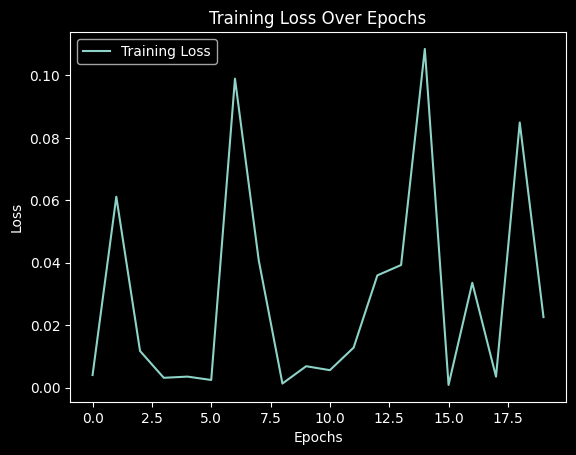

In [78]:
training_losses = []
model.train()
for epoch in range(num_epochs):
    
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        outputs = outputs.squeeze(dim=1)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    training_losses.append(loss.item())
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
import matplotlib.pyplot as plt

plt.plot(training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()



In [77]:
# Evaluation function

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = torch.sigmoid(outputs).cpu().numpy()  # Use sigmoid to get probabilities
        y_pred.extend(preds)
        y_true.extend(y_batch.numpy())

y_pred = [1 if p > 0.5 else 0 for p in y_pred]  # Convert probabilities to binary labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')



Accuracy: 0.9840
Precision: 0.9247
Recall: 0.9424
F1 Score: 0.9335
AUC: 0.9660


In [79]:
# calculate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[3803   40]
 [  30  491]]


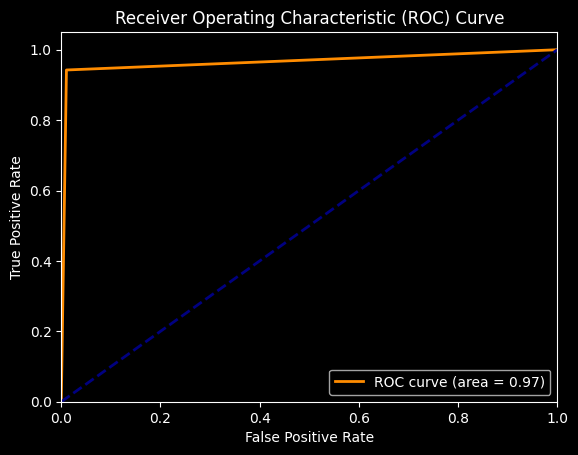

In [85]:
# calculate the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
